In [8]:
import os

import numpy as np
import pandas as pd
from influxdb import InfluxDBClient
import matplotlib.pyplot as plt

figsize = (20,10)

## 1. 3-sigma with Gaussian Distribution ##

In [4]:
# influxdb configuration
user = ''
password = ''
dbname = 'test'
measurement = "cpu.busy"
client = InfluxDBClient('168.63.66.121', '8086', user, password, dbname)

# Pull the last 8-day cpu.busy counter value of ZF006-web-3159 from DB
query = ('''SELECT * from "test"."autogen"."%s" where time > now() - 8d and hostname = 'ZF006-web-3159';''') % measurement

result = client.query(query)
points = result.get_points()

# Convert the result set to DataFrame
data_all = pd.DataFrame(points)

# View the statistics of the data set
data_all.describe()
# data_all.head()

,value
count,69120.000000
mean,10.435225
std,11.126248
min,0.756000
25%,3.836000
50%,5.838000
75%,9.415000
max,100.000000


In [5]:
# Dump the past 8-day values to csv file. And only four columns are adapted.
last_eight_day_data = data_all.to_csv('last_eight_day_data.csv',columns=['endpoint','hostname','time','value'])

In [6]:
last_eightday = pd.read_csv('last_eight_day_data.csv',usecols=['time','value'],parse_dates=['time'])
last_eightday.head()

,time,value
0,2019-07-27 09:52:10+00:00,1.508
1,2019-07-27 09:52:20+00:00,5.013
2,2019-07-27 09:52:30+00:00,5.514
3,2019-07-27 09:52:40+00:00,2.250
4,2019-07-27 09:52:50+00:00,2.267


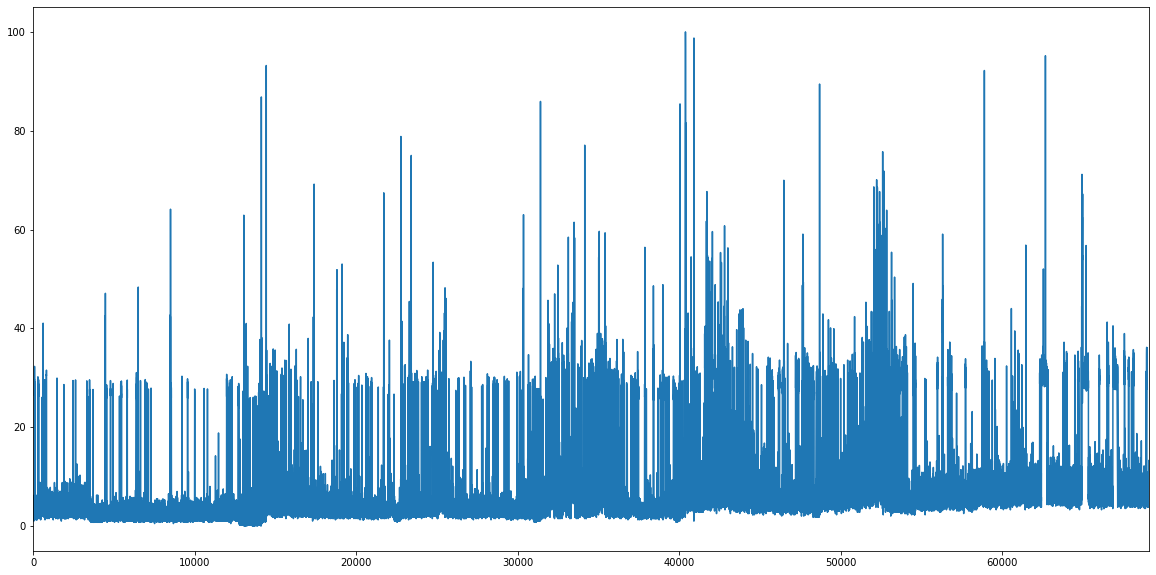

In [10]:
# Plot the data series
last_eightday.loc[:,'value'].plot(kind='line',figsize=figsize,use_index=False)

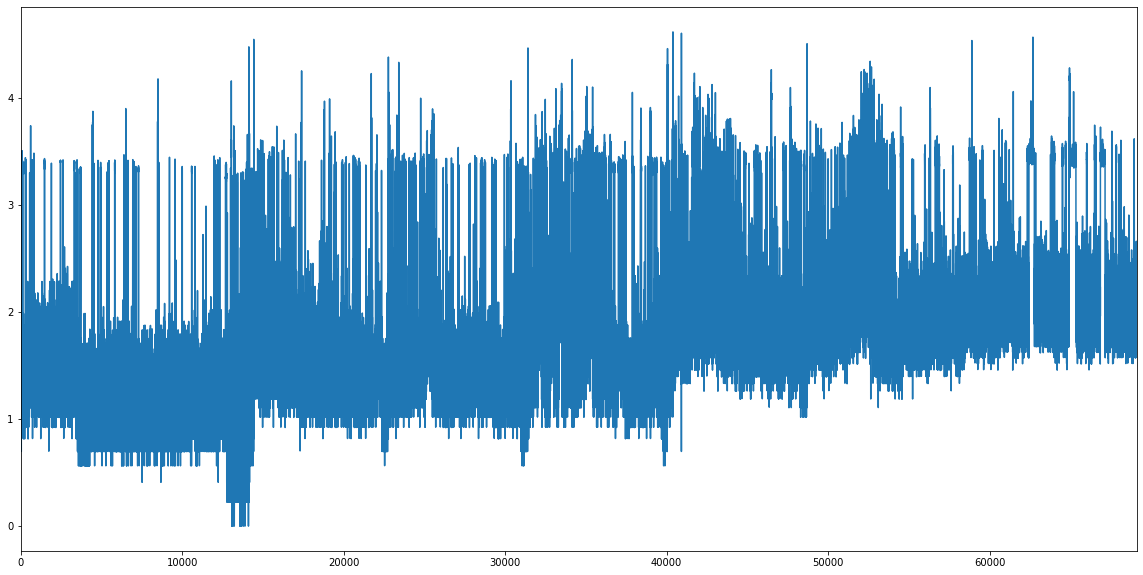

In [11]:
# Apply log1p transformation to the original value
last_eightday.loc[:,'value_log1p'] = np.log1p(last_eightday['value'])
last_eightday.loc[:,'value_log1p'].plot(kind='line',figsize=figsize,use_index=False)

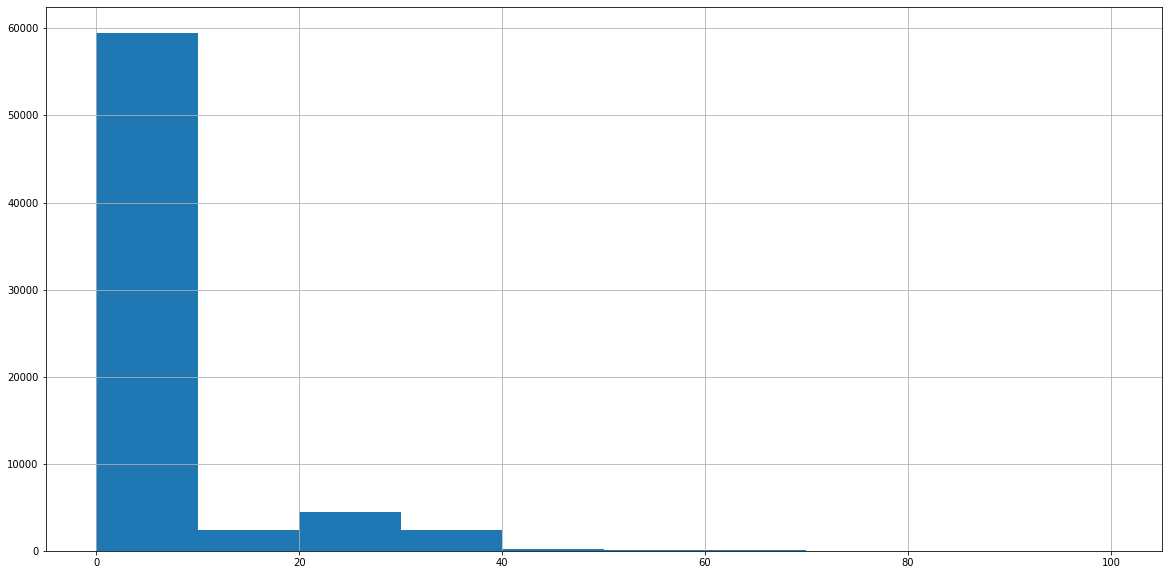

In [13]:
# Unfortunately the original data does not complies with Guassian distribution
last_eightday['value'].hist(figsize=figsize)

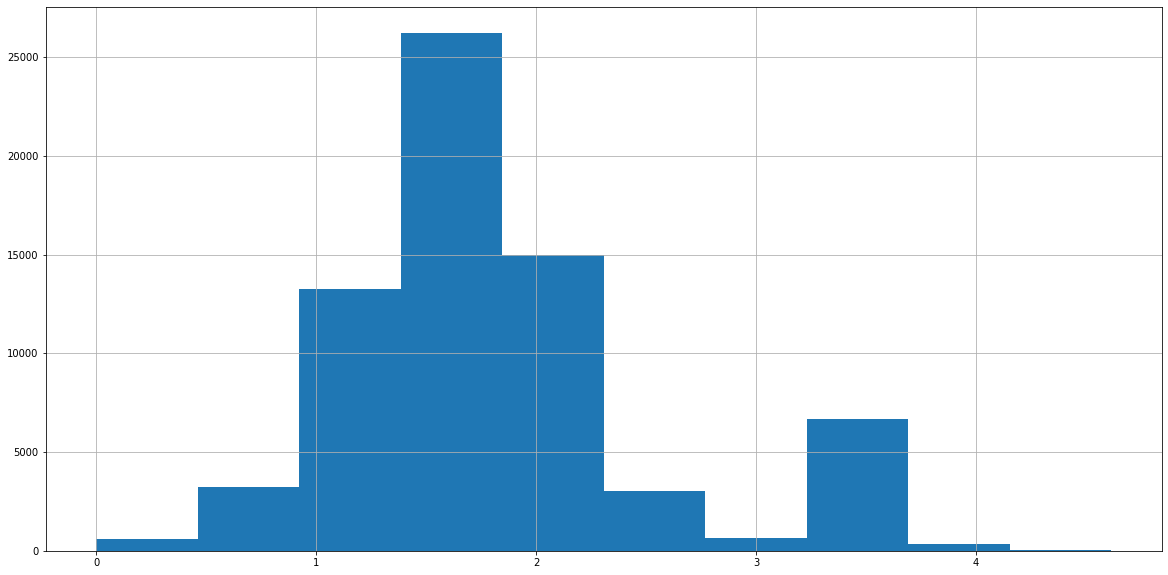

In [12]:
# Gaussian distribution is obtained after the log1p transformation
last_eightday['value_log1p'].hist(figsize=figsize)

In [15]:
# Now we'll simply consider the points which not among the 3-sigma area anomaly
new_data = last_eightday['value_log1p']
three_sigma = np.mean(new_data) - 3 * np.std(new_data), np.mean(new_data) + 3 * np.std(new_data)
print(three_sigma)
anomalys = last_eightday[last_eightday['value_log1p'] > three_sigma[1]].loc[:,['time','value']]

(-0.27698578196832213, 3.8999830458164917)


In [16]:
anomalys

,time,value
8509,2019-07-28 09:30:18+00:00,64.122
8510,2019-07-28 09:30:28+00:00,62.879
8511,2019-07-28 09:30:38+00:00,59.898
8512,2019-07-28 09:30:48+00:00,61.616
13047,2019-07-28 22:10:52+00:00,62.907
14131,2019-07-29 01:11:32+00:00,50.125
14132,2019-07-29 01:11:42+00:00,86.835
14133,2019-07-29 01:11:52+00:00,75.141
14136,2019-07-29 01:12:22+00:00,57.506
14437,2019-07-29 02:02:32+00:00,93.199


In [24]:
# In future work, we should integrate 3-sigma with sliding window mechanism

## 2. Exponential Weighted Moving Average ###

In [17]:
# In this EWMA experiment, we only check the first 360 points

first_hr = last_eightday.loc[:360,['value']]
series = first_hr['value']
alpha= 0.3

#Comput the EWMA for this series
s = [series[0]]
for i in range(1, len(series)):
    s.append(alpha * series[i] + (1 - alpha) * s[-1])

first_hr.loc[:,'ewma_original'] = s

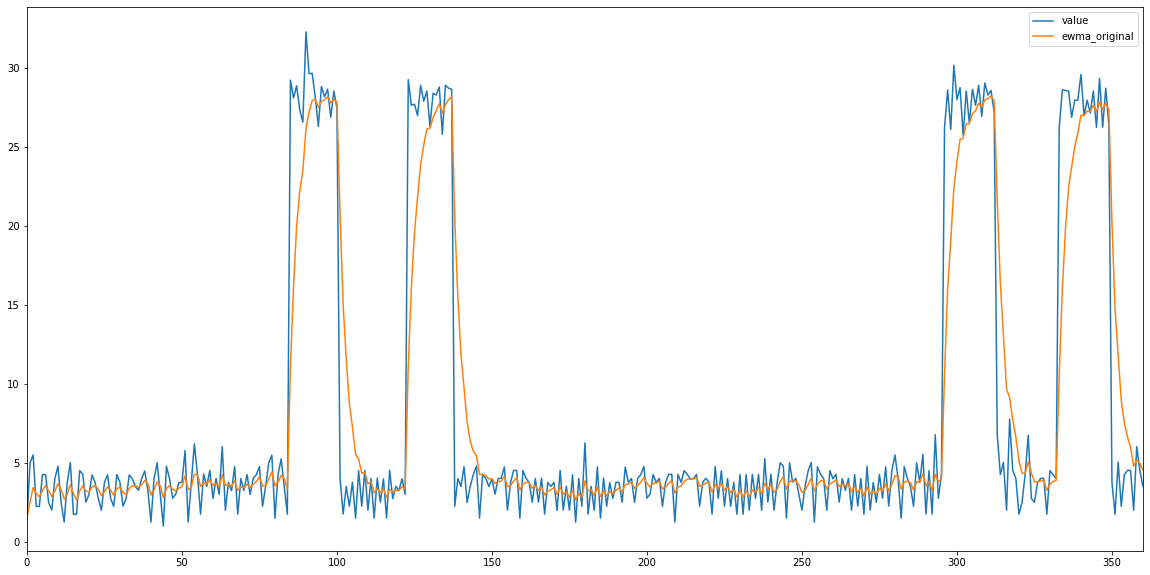

In [23]:
# Now let's plot the orginal data series and the EWMA
first_hr.loc[:,['value','ewma_original']].plot(kind='line',use_index=False,figsize=(20,10))

In [19]:
WINDOW = 100 #sliding window size, that is, we will predict the 100th point in the window based on the previous 99 points
SAMPLES = 200 #We'll check the continuous 200 points in the series
coefficient = 3
alpha = 0.3

results = []
values = first_hr['value'].values.tolist()
for i in range(SAMPLES):
    series = values[i:i+WINDOW]
    s = [series[0]]
    for i in range(1, len(series)):
        s.append(alpha * series[i] + (1 - alpha) * s[-1])
    s_avg = np.mean(s)
    sigma = np.std(series)
    ucl = s_avg + coefficient * sigma * np.sqrt(alpha / (2 - alpha))
    lcl = s_avg - coefficient * sigma * np.sqrt(alpha / (2 - alpha))
    if s[-1] > ucl or s[-1] < lcl:
        results.append(0)
    else:
        results.append(1)

In [20]:
# Print the anomaly points detected by EWMA
for i in range(len(results)):
    if not results[i]:
        print(100+i, first_hr.loc[100+i,'value'])

100 27.480999999999998
101 4.051
102 1.7719999999999998
127 28.934
128 27.919
129 28.570999999999998
130 26.343000000000004
131 28.426
132 28.316
133 28.826999999999998
134 25.831
135 28.934
136 28.753
137 28.68
138 2.267
297 28.645
298 26.142
299 30.203000000000003


In [21]:
print(results)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [22]:
# We believe that EWMA is also performing reasonably after some tuning